# Project Name:  A/B testing for MuscleHub gym
# By: Ahmed Samir
***

## Introduction

Like most businesses, Janet keeps her data in a SQL database. So we have already downloaded the data from her database to a csv file, and will load it into our Jupyter Notebook using pandas to conduct A/B testing for the MuscleHub Gym.

Let's get started!

# Import datasets

Let's import the four csv files as pandas DataFrames and examine them. 

### Import needed packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('Setup completed')

Setup completed


### load datasets

#### Applications dataset

In [2]:
applications=pd.read_csv("applications.csv")
applications.sample(2)

,first_name,last_name,email,gender,application_date
476,Erika,Santana,ErikaSantana70@hotmail.com,female,2017-08-08
202,Colleen,Goodwin,Colleen.Goodwin@gmail.com,female,2017-07-18


#### Fitness dataset

In [3]:
fitness_tests=pd.read_csv("fitness_tests.csv")
fitness_tests.sample(2)

,first_name,last_name,email,gender,fitness_test_date
1931,Lonnie,Maxwell,LMaxwell1979@gmail.com,male,2017-09-23
1623,Lena,Battle,LenaBattle81@gmail.com,female,2017-08-11


#### Purchases dataset

In [4]:
purchases=pd.read_csv("purchases.csv")
purchases.head(2)

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16


#### Visits dataset

In [5]:
visits=pd.read_csv("visits.csv")
visits.head(2)

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17


## Join all of your data

It would be helpful to have a single DataFrame with all of this data. 

Create a DataFrame containing all of this data. Keep in mind that not all visits in **visits.csv** occurred during the A/B test. You’ll only want to pull data where `visit_date` is on or after 7-1-17.


You'll need the following columns:

* `visits.first_name`
* `visits.last_name`
* `visits.gender`
* `visits.email`
* `visits.visit_date`
* `fitness_tests.fitness_test_date`
* `applications.application_date`
* `purchases.purchase_date`

In [6]:
#our visits data on or after 7-1-17
visits=visits[visits.visit_date >= '7-1-17']
visits.head(2)

,first_name,last_name,email,gender,visit_date
1000,Kim,Walter,KimWalter58@gmail.com,female,7-1-17
1001,Tom,Webster,TW3857@gmail.com,male,7-1-17


In [7]:
#Let's merge all four DataFrames in one dataframe called (data)
data=visits.merge(fitness_tests,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    applications,on=['first_name', 'last_name', 'email', 'gender'], how='left').merge(
    purchases,on=['first_name', 'last_name', 'email', 'gender'], how='left')

In [8]:
data.shape

(5004, 8)

In [9]:
data.sample(3)

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date
4897,Ronnie,Benson,Ronnie.Benson@gmail.com,male,9-8-17,2017-09-09,NaN,NaN
4687,Sonia,Duffy,SD6364@gmail.com,female,9-4-17,2017-09-07,NaN,NaN
4989,Luis,Horne,LH9941@outlook.com,male,9-9-17,NaN,NaN,NaN


In [10]:
print('No of customers in our data is', data.shape[0])

No of customers in our data is 5004


## Visualize the Groups

Having compiled the DataFrame we can use to begin our project.

Let's Make at least one visualization that depicts the distribution of potential customers that were given a fitness test and those that were not.

To conduct the A/B test we need to determine which customers were given a fitness test. We'll use the variable containing fitness test dates to create a new variable with values of 'A' if the fitness test date variable is not None, and 'B' if the fitness test date variable is None.

In [11]:
data['a/b testing groups']=data.fitness_test_date.apply(lambda x:'A' if pd.notnull(x) else 'B')

In [12]:
data.sample(2)

,first_name,last_name,email,gender,visit_date,fitness_test_date,application_date,purchase_date,a/b testing groups
2557,Colleen,Hubbard,CH1920@gmail.com,female,8-24-17,NaN,NaN,NaN,B
4565,Ron,Hendricks,RHendricks1994@gmail.com,male,9-29-17,NaN,NaN,NaN,B


In [13]:
#Let's check no of customers in each group and their percentage in our data
print(data['a/b testing groups'].value_counts())
print('*'*20)
print(data['a/b testing groups'].value_counts(normalize=True)*100)

A    2504
B    2500
Name: a/b testing groups, dtype: int64
********************
A    50.039968
B    49.960032
Name: a/b testing groups, dtype: float64


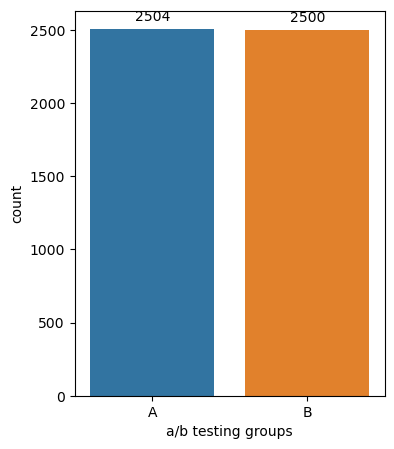

In [28]:
#let's make a countplot visualization for the 2 groups customers number.
plt.figure(figsize=(4,5))
A_B_plot=sns.countplot(x='a/b testing groups',data=data)
for p in A_B_plot.patches:
    A_B_plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

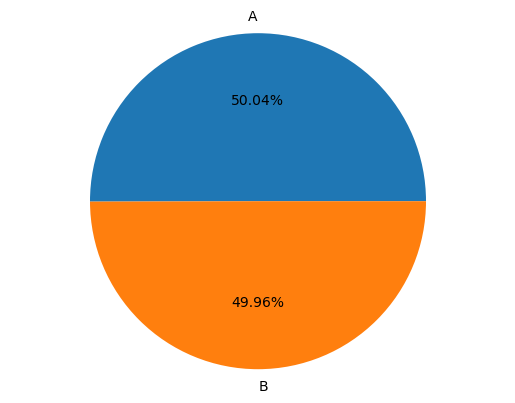

In [31]:
#let's make a pie chart for the 2 groups customers number.
# Create a  of test group
plt.pie(data['a/b testing groups'].value_counts(), labels=['A', 'B'], autopct='%0.2f%%')
plt.axis('equal')
plt.show()

### Sounds great! Our two groups are almost equally splitted in our dataset

# A/B testing related to no of applications

### Let's determine the no and percentage of applications for the two groups

In [36]:
#Let's create a column related to applications
data['is application']=data.application_date.apply(lambda x:'Application' if pd.notnull(x) else 'No Application')

#Let's create a dataframe called ( apps_count) related to no of applications for the 2 groups
apps_count=data.groupby(['a/b testing groups', 'is application'])\
               .first_name.count().reset_index()

#Let's create a pivot table for the apps count for easily readability
apps_pivot= app_counts.pivot(columns='is application',
                            index='a/b testing groups',
                            values='first_name')\
            .reset_index()
#Let's create a column related to the total number of applications & No applications
apps_pivot['Total']=apps_pivot.Application + apps_pivot['No Application']

#Let's determine the percentage of applications for the  two groups
apps_pivot['Applications_percentage']=(apps_pivot.Application/apps_pivot.Total)*100

#view the apps_pivot
apps_pivot

is application,a/b testing groups,Application,No Application,Total,Applications_percentage
0,A,250,2254,2504,9.984026
1,B,325,2175,2500,13.000000


It sounds that more people from Group B turned in application filling phase than Group A but we need to know if this difference is statistically significant or not.

## Determine the statistical significance of applications

Having calculated the difference in who turned in an application between groups, determine if this difference is statistically significant.
Since the difference is between 2 catogerical variables, we will use chi_square test to calculate the p-value and compare it to our significance level set at 0.5

In [37]:
#Let's import our module containing chi square test
from scipy.stats import chi2_contingency

#Let's assign our contingancy table
cont_table=[[250,2254],[325,2175]]

#determine p-value
chi2_contingency(cont_table)

Chi2ContingencyResult(statistic=10.893961295282612, pvalue=0.0009647827600722304, dof=1, expected_freq=array([[ 287.72981615, 2216.27018385],
       [ 287.27018385, 2212.72981615]]))

**Since the p-value ( 0.0009647827600722304 ) is less than our significance level set at 0.5, it indicates that there is a statistically signifant difference between the two groups related to no of applications.**

## A/B testing related to no of memberships from applications

### Let's determine the no and percentage of memberships from applications for the two groups

In [50]:
#Let's create a column related to no  memberships from applications
data['is_member']=data.purchase_date.apply(lambda x:'Member' if pd.notnull(x) else 'Not Member')

#Let's create a dataframe called ( just_apps) related to customers who filled out an application
just_apps=data[data['is application']=='Application']

member_count=just_apps.groupby(['a/b testing groups', 'is_member'])\
               .first_name.count().reset_index()

#Let's create a pivot table for the apps count for easily readability
member_pivot= member_count.pivot(columns='is_member',
                            index='a/b testing groups',
                            values='first_name')\
            .reset_index()

#Let's create a column related to the total number of memberships from applications of the 2 groups
member_pivot['Total']=member_pivot.Member + member_pivot['Not Member']

#Let's determine the percentage of applications for the  two groups
member_pivot['Members_percentage']=(member_pivot.Member/member_pivot.Total)*100

#view the apps_pivot
member_pivot

is_member,a/b testing groups,Member,Not Member,Total,Members_percentage
0,A,200,50,250,80.000000
1,B,250,75,325,76.923077


It sounds that people who took the fitness test were more likely to purchase a membership if they picked up an application but we need to know if this difference is statistically significant or not.

## Determine the statistical significance of memberships from applications

Calculate if the difference between the following groups is statistically significant: 
- The customers that picked up an application and took a fitness test.
- The customers that did not take a fitness test and picked up an application.

In [51]:
#Let's assign our contingancy table
cont_table2=[[200,50],[250,75]]

#determine p-value
chi2_contingency(cont_table2)

Chi2ContingencyResult(statistic=0.615869230769231, pvalue=0.43258646051083327, dof=1, expected_freq=array([[195.65217391,  54.34782609],
       [254.34782609,  70.65217391]]))

Since the p-value ( 0.43258646051083327 ) is greater than our significance level set at 0.5, it indicates that there **is not** a statistically signifant difference between the two groups related to no of memberships from applications.

## A/B testing related to no of all memberships from all visitors

### Let's determine the no and percentage of all memberships from all visitors

In [52]:
all_members_count=data.groupby(['a/b testing groups', 'is_member'])\
               .first_name.count().reset_index()

#Let's create a pivot table for the apps count for easily readability
all_members_pivot= all_members_count.pivot(columns='is_member',
                            index='a/b testing groups',
                            values='first_name')\
            .reset_index()

#Let's create a column related to the total number of all memberships from all visitors
all_members_pivot['Total']=all_members_pivot.Member + all_members_pivot['Not Member']

#Let's determine the percentage of all memberships from all visitors for the  two groups
all_members_pivot['Members_percentage']=(all_members_pivot.Member/all_members_pivot.Total)*100

#view the apps_pivot
all_members_pivot

is_member,a/b testing groups,Member,Not Member,Total,Members_percentage
0,A,200,2304,2504,7.98722
1,B,250,2250,2500,10.00000


It sounds that people of Group B ( not taking fitness test ) were more likely to purchase a membership than the people of Group A ( taking fitness test ) which proves that Janest's hypothesis but we need to know if this difference is statistically significant or not.

In [53]:
#Let's assign our contingancy table
cont_table3=[[200,2304],[250,2250]]

#determine p-value
chi2_contingency(cont_table3)

Chi2ContingencyResult(statistic=5.949182292591156, pvalue=0.014724114645783203, dof=1, expected_freq=array([[ 225.17985612, 2278.82014388],
       [ 224.82014388, 2275.17985612]]))

A p-value of 0.0147 relative to a significance threshold of 0.05 indicates that there is a statistically signifant difference between the two groups. This informs us that we should not reject Janet's hypothesis that visitors assigned to Group B will be more likely to eventually purchase a membership to MuscleHub than visitors assigned to Group A.

However, it is important to note that when assessing the groups among those customers that filled out an application, those that completed a fitness test (Group A), were more likely to make a purchase than those customers that did not complete a fitness test (Group B).

## Visualize the results

Create visualizations for Janet that show the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:

- Percent of visitors who apply.
- Percent of applicants who purchase a membership.
- Percent of visitors who purchase a membership.

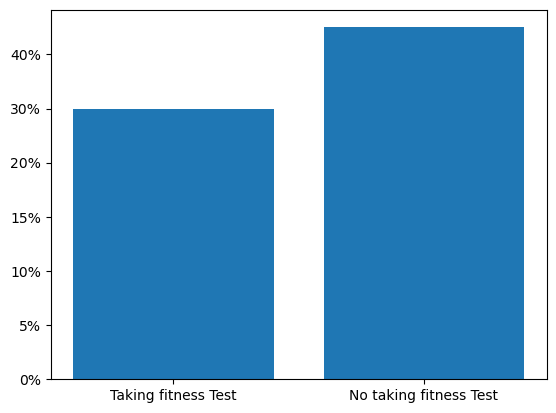

In [64]:
# Percent of Visitors who Apply
ax = plt.subplot()
plt.bar(range(len(apps_pivot)),
       apps_pivot['Applications_percentage'].values)
ax.set_xticks(range(len(apps_pivot)))
ax.set_xticklabels(['Taking fitness Test', 'No taking fitness Test'])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%','30%','40%','50%'])
plt.show()
# plt.savefig('percent_visitors_apply.png')

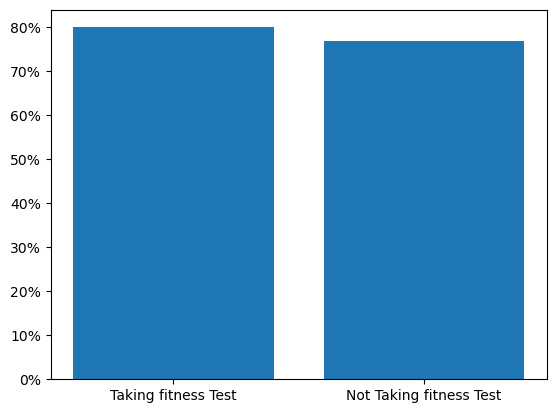

In [65]:
# Percent of Applicants who Purchase
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Members_percentage'].values)
ax.set_xticks(range(len(member_pivot)))
ax.set_xticklabels(['Taking fitness Test', 'Not Taking fitness Test'])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
# plt.savefig('percent_apply_purchase.png')

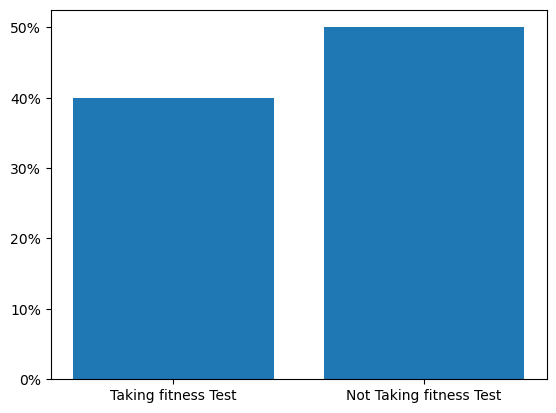

In [68]:
# Percent of Visitors who Purchase
ax = plt.subplot()
plt.bar(range(len(all_members_pivot)),
       all_members_pivot['Members_percentage'].values)
ax.set_xticks(range(len(all_members_pivot)))
ax.set_xticklabels(['Taking fitness Test', 'Not Taking fitness Test'])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
# plt.savefig('percent_visitors_purchase.png')

## Congratulations!!

Congratulations, your work has been a valuable contribution for Janet to determine MuscleHub's membership process. Janet asks if you would also help her share your work with a presentation. 

## Challenge Assignment

- Develop a presentation that demonstrates your findings to Janet. She has decided that your recommendation will determine if potential customers should take a fitness test as a component of their application. Your presentation should include the following:
    - A title slide
    - A description of what happened in this A/B test
    - A summary of your dataset and any information you think would be helpful background
    - The results of the three hypothesis tests that you ran, including an explanation of the type of test that you used and why it was appropriate
    - A summary of the qualitative data
    - A recommendation for MuscleHub

- Create a [wordcloud](https://pypi.org/project/wordcloud/) visualization that Janet can use to create an ad for the MuscleHub Gym with the data in `interviews.txt`. 